# Multilayer Perceptron from raw data
This notebook will guide you through the use of the `keras` package to train a multilayer perceptron for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998

## Loading the packages

In [59]:
%pip install tensorflow --upgrade
%pip install keras --upgrade

import numpy as np
from matplotlib import pyplot as pl

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.utils import np_utils
from sklearn import metrics as me
from sklearn.metrics import ConfusionMatrixDisplay

%matplotlib inline

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Using raw data to train a MLP
First load the `mnist` dataset and normalize it to be in the range [0, 1]

In [60]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

n_classes = 10
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

60000 train samples
10000 test samples


Create the MLP

In [61]:
model = Sequential()
model.add(Dense(900, input_shape=(784,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 900)               706500    
                                                                 
 dropout_6 (Dropout)         (None, 900)               0         
                                                                 
 dense_23 (Dense)            (None, 10)                9010      
                                                                 
Total params: 715,510
Trainable params: 715,510
Non-trainable params: 0
_________________________________________________________________


Define some constants and train the MLP

In [62]:
batch_size = 128
n_epoch = 10

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=n_epoch,
                    verbose=1, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 6s 13ms/step - loss: 0.2843 - accuracy: 0.9164 - val_loss: 0.1308 - val_accuracy: 0.9599
Epoch 2/10
469/469 [==============================] - 5s 12ms/step - loss: 0.1346 - accuracy: 0.9604 - val_loss: 0.0946 - val_accuracy: 0.9721
Epoch 3/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1026 - accuracy: 0.9696 - val_loss: 0.0830 - val_accuracy: 0.9753
Epoch 4/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0847 - accuracy: 0.9744 - val_loss: 0.0721 - val_accuracy: 0.9784
Epoch 5/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0737 - accuracy: 0.9788 - val_loss: 0.0738 - val_accuracy: 0.9797
Epoch 6/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0654 - accuracy: 0.9804 - val_loss: 0.0678 - val_accuracy: 0.9820
Epoch 7/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0588 - accuracy: 0.9823 - val_loss: 0.0656 - val_accuracy: 0.9818

Show the performance of the model

Test score: 0.0693397969007492
Test accuracy: 0.9830999970436096


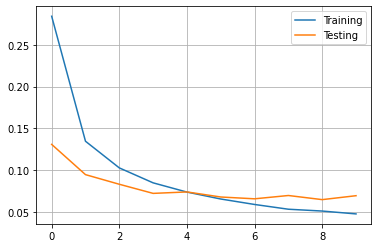

In [63]:
pl.plot(history.history['loss'], label='Training')
pl.plot(history.history['val_loss'], label='Testing')
pl.legend()
pl.grid()

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Confusion matrix

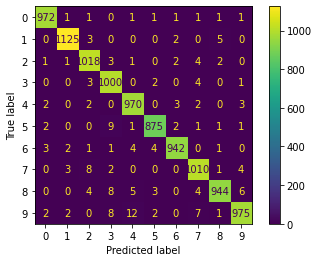

[0.99082569 0.99162627 0.98262548 0.97991181 0.98178138 0.98369871
 0.98638743 0.98010674 0.97823834 0.975     ]


In [64]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis=-1)
cm = me.confusion_matrix(y_test, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
pl.show()

# Compute the F1 score for each class
f1_score = me.f1_score(y_test, pred, average=None)
print(f1_score)
